<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [2]:
path = r"/content/SalaryData_Train.csv"
path1 = r"/content/SalaryData_Test.csv"

In [3]:
train_data = pd.read_csv(path)
test_data = pd.read_csv(path1)

In [4]:
train_data = train_data.drop('educationno', axis=1)
test_data = test_data.drop('educationno', axis=1)

In [5]:
label_encoder = LabelEncoder()
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

In [6]:
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']
X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

In [7]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7915006640106241


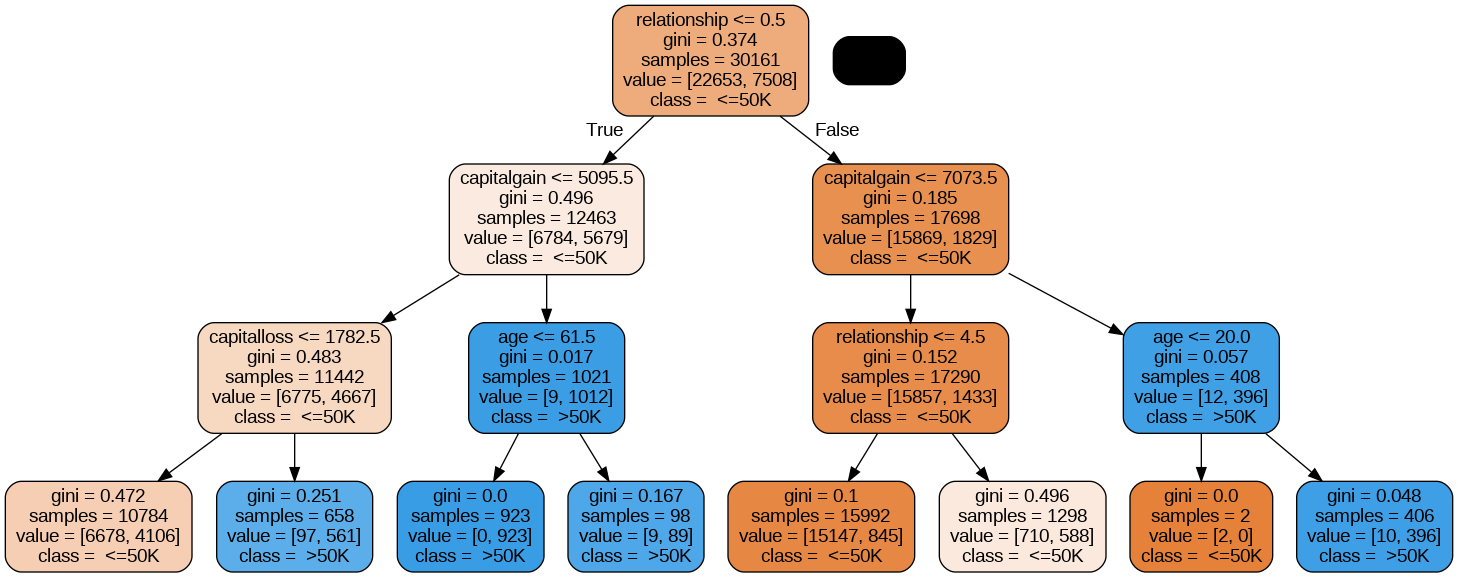

In [10]:
tree_est = tree.DecisionTreeClassifier(max_depth=3)
tree_est.fit(X_train, y_train)

dot_data = export_graphviz(tree_est, out_file=None,
                           feature_names=X_train.columns,
                           class_names=model.classes_,
                           filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())